## Nanodegree Project 2 - Data Wrangling (WeRateDogs)


# Introduction
The data here is downloaded from WeRateDogs Twitter archive via Udacity exclusively  to use in this project. This archive contains basic tweet data (tweet ID, timestamp, text, etc.) for all 5000+ of their tweets as they stood on August 1, 2017.

### Data Gathering process


In [709]:
import requests
import os
import tweepy
import numpy as np
import requests
import pandas as pd
import json
import time
import math
import matplotlib.pyplot as plt
from timeit import default_timer as timer
from PIL import Image 
from io import BytesIO
%matplotlib inline
import re

In [710]:
# Import the Twitter archive CSV file into a DataFrame
tweetdata_df = pd.read_csv('C:/Users/itjar/Documents/Nanodegree/Data wrangling assisgnment/twitter_archive_enhanced.csv', dtype={"tweet_id": str})

In [711]:
tweetdata_df.head(3)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


### information about the Twittwer archive shows that, there are 2356 rows and 17 columns with different datatype

In [712]:
# Twitter archive information
tweetdata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   object 
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

## Information from the dataset.
> The tweets contains 17 columns and 2356 rows which contains some information as tweet_id,in_reply_to_status_id, in_reply_to_user_id, timestamp,source, text, rating_numerator, rating_denominator,name. Also, there are some column headers which has unclear meaning as doggo, floofer, pupper, puppo. it is observed that there are some missing values in some columns like "in_reply_to_status_id, in_reply_to_user_id,retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls".

### The tweet image predictions
The code below show the tweet image predictions data of the dogs in the tweet where it shows 2075 rows and 12 columns with different dataset


In [713]:
#importing tsv file as csv with tab delimeter
dog_image = pd.read_csv('image_predictions.tsv', sep='\t', dtype={"tweet_id": str})
dog_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [714]:
dog_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [715]:
dog_image.describe().T

,count,mean,std,min,25%,50%,75%,max
img_num,2075.0,1.203855,0.561875,1.000000e+00,1.000000,1.000000,1.000000,4.000000
p1_conf,2075.0,0.594548,0.271174,4.433340e-02,0.364412,0.588230,0.843855,1.000000
p2_conf,2075.0,0.134589,0.100666,1.011300e-08,0.053886,0.118181,0.195565,0.488014
p3_conf,2075.0,0.060324,0.050906,1.740170e-10,0.016222,0.049444,0.091808,0.273419


In [1]:
sum(dog_image.duplicated())


NameError: name 'dog_image' is not defined

In [717]:
dog_image.isnull().sum()


tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

### Dog image Summary<br> 
There are 2075 columns and 12 roows in the data set, the column names includes ['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2','p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog']

### Additional data from the Twitter API
The tweet_json.text file is used to investigate additional data from Twittwer API, the pandas DataFrame gives four columns which are  tweet ID, retweet count, favorite count and display_text_range. 

In [718]:
# Declare Twitter API keys and access tokens, 
# however my tweeter developer is yet to be approved, that why I use provided file.
consumer_key = 'YOUR CONSUMER KEY'
consumer_secret = 'YOUR CONSUMER SECRET'
access_token = 'YOUR ACCESS TOKEN'
access_secret = 'YOUR ACCESS SECRET'

In [719]:
# List of dictionaries to read tweet's JSON data line by line and later convert to a DataFrame
tweet_list = []
with open('tweet_json.txt', 'r') as json_file:
    for line in json_file:
        status = json.loads(line)
        
        # Append to list of dictionaries
        tweet_list.append({'tweet_id': status['id'],
                        'retweet_count': status['retweet_count'],
                        'favorite_count': status['favorite_count'],
                        'display_text_range': status['display_text_range']
                       })


In [720]:
# To create a DataFrame with tweet ID, retweet count, favorite count and display_text_range
tweet_df = pd.DataFrame(tweet_list, columns = ['tweet_id', 'retweet_count', 'favorite_count', 'display_text_range'])


# Assessing Data


### tweetdata_df - The WeRateDogs Twitter archive <br>

The following columns will be elaborated, namely:

- tweet_id (int64) unique identifier of a tweet <br>
- timestamp (datetime) UTC time when this Tweet was created<br>
- source (str) Utility used to post the Tweet, as an HTML-formatted string<br>
- text (str) The actual UTF-8 text of the status update<br>
- rating_numerator (int64) dog rating numerator<br>
- rating_denominator (int64) dog rating denominator<br>
- name - dog's name<br>
- doggo, floofer, pupper, puppo are kind of a dog personality<br>

In [721]:
tweetdata_df.sample(3)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
150,863062471531167744,NaN,NaN,2017-05-12 16:05:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Quinn. She's quite the goofball. ...,NaN,NaN,NaN,"https://www.gofundme.com/helpquinny,https://tw...",13,10,Quinn,None,None,None,None
1979,672980819271634944,NaN,NaN,2015-12-05 03:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Extraordinary dog here. Looks large. Just a he...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672980819...,5,10,None,None,None,None,None
860,763167063695355904,NaN,NaN,2016-08-10 00:16:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Eve. She's a raging alcoho...,6.732953e+17,4.196984e+09,2015-12-06 00:17:55 +0000,https://twitter.com/dog_rates/status/673295268...,8,10,Eve,None,None,pupper,None


In [722]:
tweetdata_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   object 
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [723]:
tweetdata_df.isnull().sum()


tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [724]:
tweetdata_df.describe()

,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [725]:
tweetdata_df.loc[tweetdata_df['rating_numerator'] > 15]


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None


In [726]:
tweetdata_df[tweetdata_df['rating_denominator'] !=10] 


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


In [727]:
# Twittwer API data information is shown here
tweet_df.head(5).T


,0,1,2,3,4
tweet_id,892420643555336193,892177421306343426,891815181378084864,891689557279858688,891327558926688256
retweet_count,8853,6514,4328,8964,9774
favorite_count,39467,33819,25461,42908,41048
display_text_range,"[0, 85]","[0, 138]","[0, 121]","[0, 79]","[0, 138]"


In [728]:
# the columns names of twitter archive data are shown here
tweetdata_df.keys()


Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [729]:
# the columns names of Image Predictions File data are shown here

dog_image.keys()

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [730]:
# the columns names of Additional Data via the Twitter API File data are shown here 

tweet_df.keys()


Index(['tweet_id', 'retweet_count', 'favorite_count', 'display_text_range'], dtype='object')

In [731]:
# the information on the Twitter API File data are shown here 
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2354 non-null   int64 
 1   retweet_count       2354 non-null   int64 
 2   favorite_count      2354 non-null   int64 
 3   display_text_range  2354 non-null   object
dtypes: int64(3), object(1)
memory usage: 73.7+ KB


In [732]:
tweet_df.head().T

,0,1,2,3,4
tweet_id,892420643555336193,892177421306343426,891815181378084864,891689557279858688,891327558926688256
retweet_count,8853,6514,4328,8964,9774
favorite_count,39467,33819,25461,42908,41048
display_text_range,"[0, 85]","[0, 138]","[0, 121]","[0, 79]","[0, 138]"


In [733]:
# To remove the text range
tweet_df.pop("display_text_range")

0        [0, 85]
1       [0, 138]
2       [0, 121]
3        [0, 79]
4       [0, 138]
          ...   
2349    [0, 120]
2350    [0, 137]
2351    [0, 130]
2352    [0, 139]
2353    [0, 131]
Name: display_text_range, Length: 2354, dtype: object

In [734]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [735]:
sum(tweet_df.duplicated())


0

## Assessment

# dog_image
* missing value in expanded_urls
- incorrect data type in timestamp, retweeted_status_timestamp; timestamp, retweeted_status_timestamp should be in timestamp format.
- incorrect data type in retweeted_status_id, retweeted_status_user_id; retweeted_status_id, retweeted_status_user_id should be in object.
- There are rows in our text columns that are retweeted, we need to drop those rows since we only need the original tweet
- values in the name coulmn that are in lowercase should be dropped.
- we have some columns which have some quite numbers of missig value. these columns needed to be dropped such as in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp
- timestamp is not discriptive enough (should be change to tweet_date)
- value in the source column should be replace in this order:
    - replace Twitter for iPhone' iPhone,
    - replace 'Twitter Web Client' Twitter,
    * replace 'Vine - Make a Scene' Vine,
    * replace 'TweetDeck' TweetDeck
- The rating_numerator and the rating_denominator is more approprate in float data type.
- There is invalid data in expand url column in index number 2074 as picture of human is found instead of dog
# tweet_df
- tweet_id should be changed to object data type
- To remove the display text range column
#Tidiness
# dog_image
- columns header should be value not variable name(doggo, floofer, pupper,puppo)
- each observation unit represents a table. The twitter Api, Image prediction df and twitter enhanced should be merge.

### <b> Cleaning

In [736]:
tweetdata_clean = tweetdata_df.copy()
tweetdf_clean = tweet_df.copy()
dogimage_clean = dog_image.copy()

### undiscriptive columns name
### Define
- replace p1 with ist_prediction, p2 with 2nd_prediction, p3 with 3rd_prediction, p1_conf with ist_prediction_conf, p2_conf with 2nd_prediction_conf, p3_conf with 3rd_prediction_conf

### Code

In [737]:
dogimage_clean.rename(columns = {'p1': 'ist_prediction', 'p2': 'second_prediction', 'p3' : 'third_prediction', 
                           'p1_conf' : 'ist_prediction_conf', 'p2_conf' : 'second_prediction_conf', 
                           'p3_conf' : ' third_prediction_conf', 'p1_dog' : 
                            'third_prediction_dog', 'p2_dog': 'second_prediction_dog', 
                            'p3_dog': 'third_prediction_dog' }, inplace= True) 

### Test

In [738]:
dogimage_clean.head()

,tweet_id,jpg_url,img_num,ist_prediction,ist_prediction_conf,third_prediction_dog,second_prediction,second_prediction_conf,second_prediction_dog,third_prediction,third_prediction_conf,third_prediction_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Define
tweet_id data type should be changed to object data type

### Code

In [739]:
dogimage_clean.tweet_id =dogimage_clean.tweet_id.astype('str')


### Test

In [740]:
dogimage_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   tweet_id                2075 non-null   object 
 1   jpg_url                 2075 non-null   object 
 2   img_num                 2075 non-null   int64  
 3   ist_prediction          2075 non-null   object 
 4   ist_prediction_conf     2075 non-null   float64
 5   third_prediction_dog    2075 non-null   bool   
 6   second_prediction       2075 non-null   object 
 7   second_prediction_conf  2075 non-null   float64
 8   second_prediction_dog   2075 non-null   bool   
 9   third_prediction        2075 non-null   object 
 10   third_prediction_conf  2075 non-null   float64
 11  third_prediction_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


#### Define
drop columns with no values or extremely missing values in df_twitterE

#### Code

In [741]:
tweetdata_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis= 1, inplace= True)

Test

In [742]:
tweetdata_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [743]:
sum(tweetdf_clean.duplicated())


0

#### Define
- timestamp should be changed to datetime datatype and rename timestamp to tweet date
- change tweet_id from integer data type to object data type
- change rating numerator and rating denominator to float data type
#### Code

In [744]:
tweetdata_clean.rename(columns={ 'timestamp' : 'tweet_date'}, inplace = True )
tweetdata_clean.tweet_date = pd.to_datetime(tweetdata_clean.tweet_date)
tweetdata_clean.tweet_id = tweetdata_clean.tweet_id.astype('str')
tweetdata_clean['rating_numerator'] = tweetdata_clean['rating_numerator'].astype('float')
tweetdata_clean['rating_denominator'] = tweetdata_clean['rating_denominator'].astype('float')

Test

In [745]:
tweetdata_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2356 non-null   object             
 1   tweet_date          2356 non-null   datetime64[ns, UTC]
 2   source              2356 non-null   object             
 3   text                2356 non-null   object             
 4   expanded_urls       2297 non-null   object             
 5   rating_numerator    2356 non-null   float64            
 6   rating_denominator  2356 non-null   float64            
 7   name                2356 non-null   object             
 8   doggo               2356 non-null   object             
 9   floofer             2356 non-null   object             
 10  pupper              2356 non-null   object             
 11  puppo               2356 non-null   object             
dtypes: datetime64[ns, UTC](1), float64

#### Define
- remove index with row number 2074
#### Code

In [746]:
tweetdata_clean.drop(index = 2074, axis= 0, inplace= True)


Test

In [747]:
tweetdata_clean[tweetdata_clean.index == 2074]


,tweet_id,tweet_date,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### Define
- drop retweeted rating columns(for rating_numerator and rating_denominator)
#### Code

In [748]:
tweetdata_clean[tweetdata_clean['text'].str.contains("RT")]


,tweet_id,tweet_date,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,2017-07-21 01:02:36+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,https://twitter.com/dog_rates/status/887473957...,13.0,10.0,Canela,None,None,None,None
32,886054160059072513,2017-07-15 02:45:48+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,https://twitter.com/dog_rates/status/886053434...,12.0,10.0,None,None,None,None,None
36,885311592912609280,2017-07-13 01:35:06+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,https://twitter.com/dog_rates/status/830583320...,13.0,10.0,Lilly,None,None,None,None
68,879130579576475649,2017-06-26 00:13:58+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,https://twitter.com/dog_rates/status/878057613...,14.0,10.0,Emmy,None,None,None,None
73,878404777348136964,2017-06-24 00:09:53+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,"https://www.gofundme.com/3yd6y1c,https://twitt...",13.0,10.0,Shadow,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
1766,678399652199309312,2015-12-20 02:20:55+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This made my day. 12/10 please enjoy https://t...,https://twitter.com/dog_rates/status/678399652...,12.0,10.0,None,None,None,None,None
1860,675489971617296384,2015-12-12 01:38:53+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT until we find this dog. Clearly a cool dog ...,https://twitter.com/dog_rates/status/675489971...,10.0,10.0,None,None,None,None,None
1991,672622327801233409,2015-12-04 03:43:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This lil pupper is sad because we haven't foun...,https://twitter.com/dog_rates/status/672622327...,12.0,10.0,None,None,None,pupper,None
2259,667550904950915073,2015-11-20 03:51:52+00:00,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,https://twitter.com/dogratingrating/status/667...,12.0,10.0,None,None,None,None,None


In [749]:
#identifying the retweet text index number
RT = tweetdata_clean[tweetdata_clean['text'].str.contains("RT")].index
#drop rating number with the retweet text
tweetdata_clean.drop(RT, inplace = True)

Test


In [750]:
tweetdata_clean[tweetdata_clean['text'].str.contains("RT")]


,tweet_id,tweet_date,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### Define

 Show and remove incorrect rating


<b> Code

In [751]:
tweetdata_clean[tweetdata_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

C:\Users\itjar\AppData\Local\Temp\ipykernel_6788\2397714217.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  tweetdata_clean[tweetdata_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]


,text,rating_numerator
45,This is Bella. She hopes her smile made you sm...,5.0
695,"This is Logan, the Chow who lived. He solemnly...",75.0
763,This is Sophie. She's a Jubilant Bush Pupper. ...,27.0
1689,I've been told there's a slight possibility he...,5.0
1712,Here we have uncovered an entire battalion of ...,26.0


In [752]:
tweetdata_clean.drop(index = 45, axis= 0, inplace= True)
tweetdata_clean.drop(index = 695, axis= 0, inplace= True)
tweetdata_clean.drop(index = 763, axis= 0, inplace= True)
tweetdata_clean.drop(index = 1689, axis= 0, inplace= True)
tweetdata_clean.drop(index = 1712, axis= 0, inplace= True)



<b> Test

In [753]:
tweetdata_clean[tweetdata_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

C:\Users\itjar\AppData\Local\Temp\ipykernel_6788\2397714217.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  tweetdata_clean[tweetdata_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]


,text,rating_numerator


#### Define
Replace the following variables in source coloum:

- replace Twitter for iPhone' with iPhone
- replace 'Twitter Web Client' with Twitter
- replace 'Vine - Make a Scene' with Vine
- replace 'TweetDeck' with TweetDeck
#### Code

In [754]:
tweetdata_clean.source.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>','iPhone', inplace=True)
tweetdata_clean.source.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>','Twitter', inplace=True)
tweetdata_clean.source.replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>','Vine', inplace=True)
tweetdata_clean.source.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>','Tweetdeck', inplace=True)
tweetdata_clean.rename(columns={"source_basic": "source"}, inplace=True)


<b> Test

In [755]:
tweetdata_clean.source.unique()

array(['iPhone', 'Twitter', 'Vine', 'Tweetdeck'], dtype=object)

<b> Remove lowercase names

### Define

- find all the names with lower case from the name column
- drop all the names with lower case

<b> Code

In [756]:
lowercase_dog_name = tweetdata_clean.name.str.contains('^[a-z]', regex = True)
lowercase_dogname = tweetdata_clean[lowercase_dog_name].name.value_counts().sort_index()
lowercase_dogname

a               55
actually         2
all              1
an               6
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             3
life             1
light            1
mad              1
my               1
not              2
officially       1
old              1
one              4
quite            3
space            1
such             1
the              8
this             1
unacceptable     1
very             4
Name: name, dtype: int64

In [757]:
dog_name_in_lowercase = tweetdata_clean[tweetdata_clean.name.str.islower()].index


In [758]:
tweetdata_clean.drop(dog_name_in_lowercase, inplace= True)

<b> Test

In [759]:
tweetdata_clean.name.unique()


array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'Canela', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Earl',
       'Lola', 'Kevin', 'Yogi', 'Noah', 'Grizzwald', 'Rusty', 'Gus',
       'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot', 'Louis',
       'Bella', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven',
       'Beau', 'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny', 'Nelly',
       'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash', 'Jed',
       'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie',
       'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper', 'Harold', 'Shikha',
       'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave', 'Jersey', 'Hobbes',
      

#### Define
convert the variable names (doggo, floofer, pupper,puppo) into a column and rename the column with the stage_of_dog.
#### Code

In [760]:
# handle none
tweetdata_clean.doggo.replace('None', '', inplace=True)
tweetdata_clean.floofer.replace('None', '', inplace=True)
tweetdata_clean.pupper.replace('None', '', inplace=True)
tweetdata_clean.puppo.replace('None', '', inplace=True)

# merge into column
tweetdata_clean['dog_stage'] = tweetdata_clean.doggo + tweetdata_clean.floofer + tweetdata_clean.pupper + tweetdata_clean.puppo

# handle multiple stages
tweetdata_clean.loc[tweetdata_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
tweetdata_clean.loc[tweetdata_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
tweetdata_clean.loc[tweetdata_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'

# handle missing values
tweetdata_clean.loc[tweetdata_clean.dog_stage == '', 'dog_stage'] = np.nan

#drop doggo, pupper, floofer and puppo columns
tweetdata_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis= 1, inplace = True)

Test

In [761]:
tweetdata_clean.dog_stage.value_counts()

pupper            211
doggo              72
puppo              24
floofer             9
doggo, pupper       9
doggo, puppo        1
doggo, floofer      1
Name: dog_stage, dtype: int64

In [762]:
tweetdata_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2054 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2054 non-null   object             
 1   tweet_date          2054 non-null   datetime64[ns, UTC]
 2   source              2054 non-null   object             
 3   text                2054 non-null   object             
 4   expanded_urls       1997 non-null   object             
 5   rating_numerator    2054 non-null   float64            
 6   rating_denominator  2054 non-null   float64            
 7   name                2054 non-null   object             
 8   dog_stage           327 non-null    object             
dtypes: datetime64[ns, UTC](1), float64(2), object(6)
memory usage: 160.5+ KB


<b> Remove None values in the 'name' column

In [763]:
tweetdata_clean.name.head(10)

0     Phineas
1       Tilly
2      Archie
3       Darla
4    Franklin
5        None
6         Jax
7        None
8        Zoey
9      Cassie
Name: name, dtype: object

<b> Code

In [764]:
tweetdata_clean['name'].replace('None', np.nan, inplace=True)

<b> Test

In [765]:
# After none values were removed in name column
tweetdata_clean.name.value_counts() 

Charlie       11
Lucy          11
Cooper        10
Oliver        10
Penny          9
              ..
Sephie         1
Bonaparte      1
Wishes         1
Rose           1
Christoper     1
Name: name, Length: 926, dtype: int64

#### Define
- convert tweet_id in twitter API from integer data type to object data type
#### Code

In [766]:
tweetdf_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [767]:
tweetdf_clean.tweet_id = tweetdf_clean.tweet_id.astype('str')


Test

In [768]:
tweetdf_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


In [769]:
cleaned_tweetdata_clean = tweetdata_clean.copy() 
cleaned_tweetdf_clean = tweetdf_clean.copy() 
cleaned_dogimage_clean = dogimage_clean.copy() 

#### Define
- merge twitter Api with twitter enhanced dataframe together
#### Code

In [770]:
merge_twitter = pd.merge(cleaned_tweetdata_clean, cleaned_tweetdf_clean, on = 'tweet_id', how = 'left')


<b> Test

In [771]:
merge_twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2054 entries, 0 to 2053
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2054 non-null   object             
 1   tweet_date          2054 non-null   datetime64[ns, UTC]
 2   source              2054 non-null   object             
 3   text                2054 non-null   object             
 4   expanded_urls       1997 non-null   object             
 5   rating_numerator    2054 non-null   float64            
 6   rating_denominator  2054 non-null   float64            
 7   name                1383 non-null   object             
 8   dog_stage           327 non-null    object             
 9   retweet_count       2054 non-null   int64              
 10  favorite_count      2054 non-null   int64              
dtypes: datetime64[ns, UTC](1), float64(2), int64(2), object(6)
memory usage: 192.6+ KB


In [772]:
merge_twitter.shape

(2054, 11)

<b> Define
- merge with image predict data frame <br>
#### <b>Code

In [773]:
merge_twitter = pd.merge(merge_twitter, cleaned_dogimage_clean, on = 'tweet_id', how = 'left')


In [774]:
merge_twitter.shape

(2054, 22)

<b> Test

In [775]:
merge_twitter.head(5)

,tweet_id,tweet_date,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,...,img_num,ist_prediction,ist_prediction_conf,third_prediction_dog,second_prediction,second_prediction_conf,second_prediction_dog,third_prediction,third_prediction_conf,third_prediction_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN,8853,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27+00:00,iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN,6514,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03+00:00,iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,NaN,4328,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51+00:00,iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,NaN,8964,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24+00:00,iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,NaN,9774,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


#### Saving the new cleaned data into csv


In [776]:
merge_twitterdata = merge_twitter.copy()

In [777]:
merge_twitterdata.to_csv(' twitter_archive_master.csv', index = False)

#### <b> _Data Visualization_
- Loading the cleaned data for visualization

In [778]:
twitter_df = pd.read_csv(' twitter_archive_master.csv')


In [779]:
twitter_df.tweet_date = pd.to_datetime(twitter_df.tweet_date)


In [780]:
twitter_df.shape

(2054, 22)

In [781]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2054 entries, 0 to 2053
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   tweet_id                2054 non-null   int64              
 1   tweet_date              2054 non-null   datetime64[ns, UTC]
 2   source                  2054 non-null   object             
 3   text                    2054 non-null   object             
 4   expanded_urls           1997 non-null   object             
 5   rating_numerator        2054 non-null   float64            
 6   rating_denominator      2054 non-null   float64            
 7   name                    1383 non-null   object             
 8   dog_stage               327 non-null    object             
 9   retweet_count           2054 non-null   int64              
 10  favorite_count          2054 non-null   int64              
 11  jpg_url                 1883 non-null   obj

<b> code

In [782]:
# Are there any denominators <= 0?
twitter_df[twitter_df['rating_numerator'] <= 0]

,tweet_id,tweet_date,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,...,img_num,ist_prediction,ist_prediction_conf,third_prediction_dog,second_prediction,second_prediction_conf,second_prediction_dog,third_prediction,third_prediction_conf,third_prediction_dog.1
259,835152434251116546,2017-02-24 15:40:31+00:00,iPhone,When you're so blinded by your systematic plag...,https://twitter.com/dog_rates/status/835152434...,0.0,10.0,NaN,NaN,3443,...,3.0,swing,0.967066,False,American_Staffordshire_terrier,0.012731,True,Staffordshire_bullterrier,0.007039,True
817,746906459439529985,2016-06-26 03:22:31+00:00,iPhone,"PUPDATE: can't see any. Even if I could, I cou...",https://twitter.com/dog_rates/status/746906459...,0.0,10.0,NaN,NaN,336,...,1.0,traffic_light,0.470708,False,fountain,0.199776,False,space_shuttle,0.064807,False


In [783]:
# Are there any denominators <= 0?
twitter_df[twitter_df['rating_denominator'] <= 0]

,tweet_id,tweet_date,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,...,img_num,ist_prediction,ist_prediction_conf,third_prediction_dog,second_prediction,second_prediction_conf,second_prediction_dog,third_prediction,third_prediction_conf,third_prediction_dog.1
257,835246439529840640,2017-02-24 21:54:03+00:00,iPhone,@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,960.0,0.0,NaN,NaN,83,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<b> The code shows that there are two tweet_id with numerators less than or equal to zero and rating_numerator  has only one tweet less than or equal to zero

In [784]:
common_names = twitter_df.name.value_counts().nlargest(10)
common_names

Charlie    11
Lucy       11
Cooper     10
Oliver     10
Penny       9
Tucker      9
Winston     8
Lola        8
Daisy       7
Sadie       7
Name: name, dtype: int64

<b> Most dogs names in the tweets

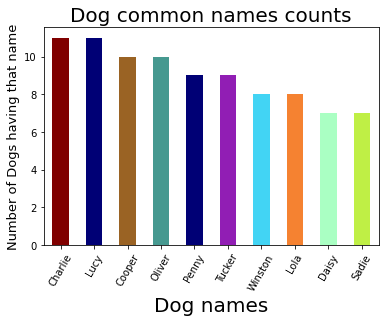

In [785]:
common_names.plot(kind='bar', color = ['#800000', '#000075', '#9A6324', '#469990', '#000075', '#911eb4', '#42d4f4', '#f58231', '#aaffc3', '#bfef45'])
plt.xticks(rotation=60)
plt.title('Dog common names counts', fontsize=20)
plt.xlabel('Dog names', fontsize=20)
plt.ylabel('Number of Dogs having that name', fontsize=13);
plt.show()

Observation: <br> 
<b> After cleaning, the most popular names are:Charlie, Lucy,  Cooper, Oliver,  Penny,Tucker, Winston, Lola,  Daisy, Sadie.

In [786]:
Dog_imagep1 = twitter_df.ist_prediction.value_counts().nlargest(10)
Dog_imagep1

golden_retriever      132
Labrador_retriever     92
Pembroke               84
Chihuahua              77
pug                    51
chow                   38
Samoyed                38
Pomeranian             35
toy_poodle             34
malamute               28
Name: ist_prediction, dtype: int64

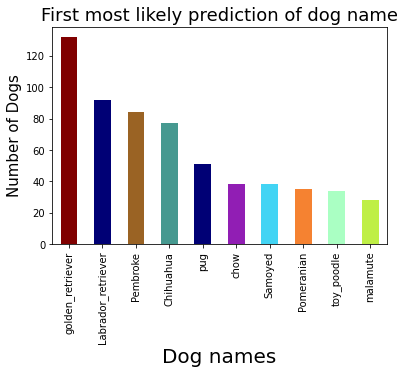

In [787]:
Dog_imagep1.plot(kind='bar', color = ['#800000', '#000075', '#9A6324', '#469990', '#000075', '#911eb4', '#42d4f4', '#f58231', '#aaffc3', '#bfef45'])
plt.xticks(rotation=90)
plt.title('First most likely prediction of dog name',fontsize=18)
plt.xlabel('Dog names', fontsize=20)
plt.ylabel('Number of Dogs', fontsize=15);
plt.show()

In [788]:
Dog_imagep2  = twitter_df.second_prediction.value_counts().nlargest(10)
Dog_imagep2

Labrador_retriever          91
golden_retriever            80
Cardigan                    70
Chihuahua                   40
French_bulldog              38
Chesapeake_Bay_retriever    38
Pomeranian                  37
toy_poodle                  35
Siberian_husky              32
cocker_spaniel              31
Name: second_prediction, dtype: int64

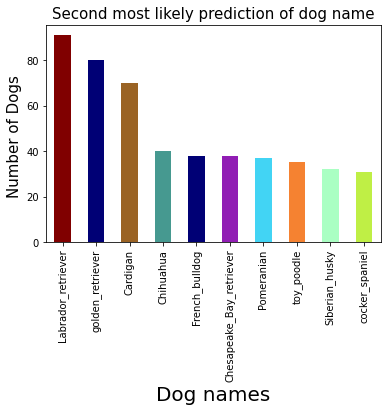

In [789]:
Dog_imagep2.plot(kind='bar',  color = ['#800000', '#000075', '#9A6324', '#469990', '#000075', '#911eb4', '#42d4f4', '#f58231', '#aaffc3', '#bfef45'])
plt.xticks(rotation=90)
plt.title('Second most likely prediction of dog name', fontsize=15)
plt.xlabel('Dog names', fontsize=20)
plt.ylabel('Number of Dogs ', fontsize=15);
plt.show()

In [790]:
Dog_imagep3 = twitter_df.third_prediction.value_counts().nlargest(10)
Dog_imagep3

Labrador_retriever           74
Chihuahua                    56
golden_retriever             42
Eskimo_dog                   33
kelpie                       32
chow                         30
Staffordshire_bullterrier    30
kuvasz                       29
beagle                       29
toy_poodle                   28
Name: third_prediction, dtype: int64

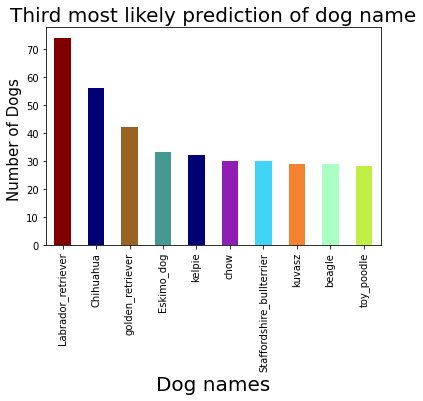

In [791]:
Dog_imagep3.plot(kind='bar',  color = ['#800000', '#000075', '#9A6324', '#469990', '#000075', '#911eb4', '#42d4f4', '#f58231', '#aaffc3', '#bfef45'])
plt.xticks(rotation=90)
plt.title('Third most likely prediction of dog name', fontsize=20)
plt.xlabel('Dog names', fontsize=20)
plt.ylabel('Number of Dogs ', fontsize=15);
plt.show()

#### **Prediction algorithm of images**
 - golden_retriever with 132 tweets has the highest prediction in the first prediction algorithm followed by Labrador_retriever with 92 prediction, while Labrador_retriever is the highest for both second (91 prediction) and third (74 prediction) prediction algorithm respectively.

### <b> Most common dogs' stages in the tweets


In [792]:
common_stages= twitter_df.dog_stage.value_counts()
common_stages

pupper            211
doggo              72
puppo              24
floofer             9
doggo, pupper       9
doggo, puppo        1
doggo, floofer      1
Name: dog_stage, dtype: int64

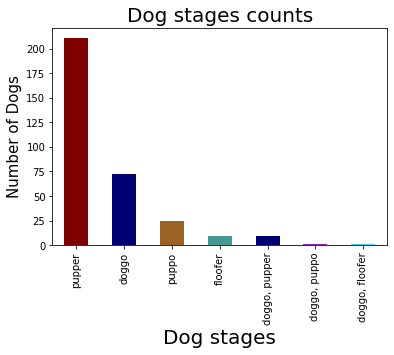

In [793]:
common_stages.plot(kind='bar',  color = ['#800000', '#000075', '#9A6324', '#469990', '#000075', '#911eb4', '#42d4f4'])
plt.xticks(rotation=90)
plt.title('Dog stages counts', fontsize=20)
plt.xlabel('Dog stages', fontsize=20)
plt.ylabel('Number of Dogs', fontsize=15);
plt.show()

The above chart shows that, Dog at  Pupper stage is the most popular in the twwet with a 211 retweets count, followed by Doggo with a 72 retweets count and Puppo with a 24 retweets count, while doggo, pupper hybrid and floofer has 9 retweet count, making both on number 4 in the list of the most popular dog stages. doggo, floofer hybrid, and doggo, puppo hybrid has only  1 retweet count.


<b> Dog Stage Analysis as Related to Retweets


In [794]:
round(twitter_df.groupby('dog_stage')['retweet_count'].mean())


dog_stage
doggo              6474.0
doggo, floofer     3433.0
doggo, pupper      4021.0
doggo, puppo      19196.0
floofer            4156.0
pupper             2437.0
puppo              6332.0
Name: retweet_count, dtype: float64

In [795]:
round(twitter_df.groupby('dog_stage')['retweet_count'].median())


dog_stage
doggo              2888.0
doggo, floofer     3433.0
doggo, pupper      2525.0
doggo, puppo      19196.0
floofer            2509.0
pupper             1258.0
puppo              3130.0
Name: retweet_count, dtype: float64

- From the above  chat and analysis, it is observed that pupper, which is the most popular dog stage, has the lowest average number of retweets as far as the mean and median are concerned, but the doggo, puppo dog stage, which only have 1 tweet, has the highest average number of retweets as far as the mean and median are concerned. in this case, the median will be more accurate to measure the central tendency as compared to the mean in the presence of the extreme values. Therefore, it would be safe to say that the doggo, puppo dog stage has the highest average number of retweets compared to other dog stages.


Text(0, 0.5, 'No of Retweet')

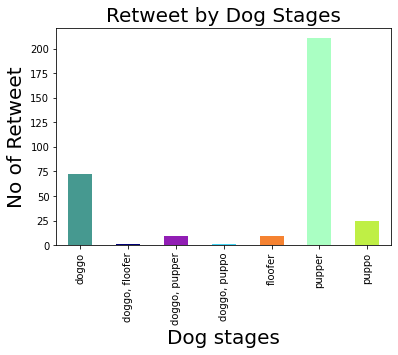

In [796]:
twitter_df.groupby('dog_stage')['favorite_count'].count().plot(kind = 'bar', color = [ '#469990', '#000075', '#911eb4', '#42d4f4', '#f58231', '#aaffc3', '#bfef45'])
plt.title('Retweet by Dog Stages',fontsize=20)
plt.xlabel('Dog stages', fontsize=20)
plt.ylabel('No of Retweet', fontsize=20)

The above visualization is similar to the retweets_count visualization. demonstrating a strong relationship between likes and the most popular dog stage.

<b> Dog Stage Analysis as Related to Favorite Count


In [797]:
round(twitter_df.groupby('dog_stage')['favorite_count'].mean())


dog_stage
doggo             17687.0
doggo, floofer    17169.0
doggo, pupper     12270.0
doggo, puppo      47844.0
floofer           11064.0
pupper             7115.0
puppo             20789.0
Name: favorite_count, dtype: float64

In [798]:
round(twitter_df.groupby('dog_stage')['favorite_count'].median())


dog_stage
doggo             11606.0
doggo, floofer    17169.0
doggo, pupper      8735.0
doggo, puppo      47844.0
floofer            6076.0
pupper             3390.0
puppo             13388.0
Name: favorite_count, dtype: float64

* From the above  chat and analysis, it is observed that pupper, which is the most popular dog stage, has the lowest average number of likes as far as the mean and median are concerned, but the puppo dog stage, which is the third most popular dog stage in terms of tweets, has the highest average number of likes as far as the mean is concerned. While _doggo, puppo_ has the highest average number of likes as far as the median is concerned.  In this case, the median will be more accurate to measure the central tendency as compared to the mean in the presence of the extreme values. Therefore, it would be safe to say that the doggo, puppo dog stage has the highest average number of likes compared to other dog stages.

Text(0.5, 0, 'favorite_count')

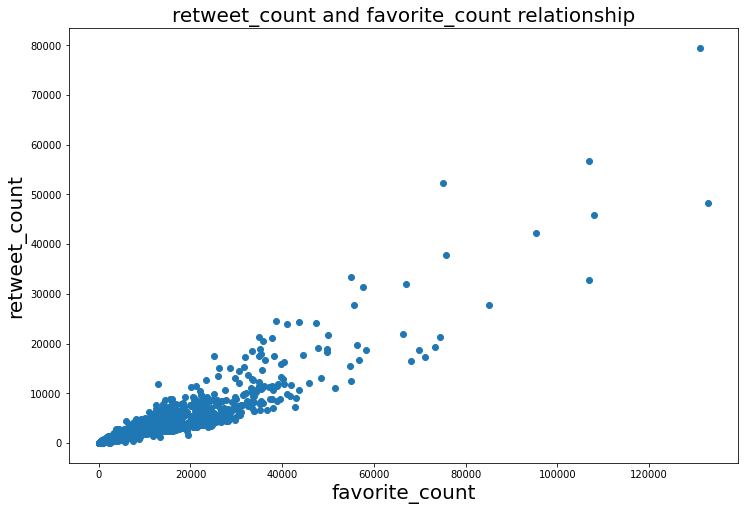

In [799]:
plt.figure(figsize=(12, 8))
plt.scatter(y = twitter_df['retweet_count'], x = twitter_df['favorite_count'])
plt.title('retweet_count and favorite_count relationship', fontsize=20)
plt.ylabel('retweet_count', fontsize=20)
plt.xlabel('favorite_count', fontsize=20)

There is a strong positive correlation between favourite and retweet, i.e linear relationship between the retweet counts and the favorite counts.

<b> Distribution of the favorite_count (likes)

In [800]:
twitter_df.favorite_count.describe()


count      2054.000000
mean       8835.972249
std       12037.833270
min          52.000000
25%        2026.500000
50%        4141.000000
75%       11307.250000
max      132810.000000
Name: favorite_count, dtype: float64

In [2]:
# Create two columns: 'date' to agregate 'datetime' 
# and 'tweet' to sum a number of tweets for a certain date
# by day
twitter_df['date'] = twitter_df['tweet_date'].dt.date
# by week
#df_arch_clean['date'] = df_arch_clean['timestamp'].dt.week
# by month
#df_arch_clean['date'] = df_arch_clean['timestamp'].dt.month
twitter_df['tweet'] = 1

# Create a new dataframe with 2 columns, gruped by date
df1 = twitter_df[['date', 'tweet']].groupby(['date']).sum() # alternatively .count() could be used

# Use moving averages to smooth the line
df1['tweet'] = df1['tweet'].rolling(window=20).mean()

# Plot
df1.plot(figsize=(14, 8), fontsize=15)
plt.title('New tweets over time', fontsize=20)
plt.ylabel('Number of tweets created', fontsize=20)
plt.xlabel('Date', fontsize=30)
plt.show()

NameError: name 'bikes_clean' is not defined

<b> Tweets in relation with date tweeted


There was high tweets of 18 at the beginning of the post in january 2016, the tweet gradually reduces 2 by may and increases sharply to 4 around July 2016 which later decreases to 2 by sept 2016. From september 2016 to july 2017, the tweets oscilate between 2 and 2.5 which shows many people are not tweeting the post again.

In [802]:
# What are possible values for img_num?
dog_image.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

<b> ist_conf has highest confident algorithm is in its #1 prediction compare to p2_config and p3_config. This is observed in its mean and other describtion.

In [803]:
# minimum retweet_count
tweet_df[tweet_df['retweet_count'] == tweet_df['retweet_count'].min()]

,tweet_id,retweet_count,favorite_count
290,838085839343206401,0,150


In [804]:
#maximum retweet_count
tweet_df[tweet_df['retweet_count'] == tweet_df['retweet_count'].max()]

,tweet_id,retweet_count,favorite_count
1037,744234799360020481,79515,131075


In [805]:
# minimum favorite_count

tweet_df[tweet_df['favorite_count'] == tweet_df['favorite_count'].min()]

,tweet_id,retweet_count,favorite_count
31,886054160059072513,108,0
35,885311592912609280,19297,0
67,879130579576475649,7181,0
72,878404777348136964,1349,0
73,878316110768087041,6965,0
...,...,...,...
1021,746521445350707200,1110,0
1041,743835915802583040,2387,0
1240,711998809858043904,138,0
2257,667550904950915073,37,0


In [806]:
#maximum favorite_count
tweet_df[tweet_df['favorite_count'] == tweet_df['favorite_count'].max()]

,tweet_id,retweet_count,favorite_count
412,822872901745569793,48265,132810


### Sources of Tweet


Code

In [807]:
tweetdata_clean.source.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>','iPhone', inplace=True)
tweetdata_clean.source.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>','Twitter', inplace=True)
tweetdata_clean.source.replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>','Vine', inplace=True)
tweetdata_clean.source.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>','Tweetdeck', inplace=True)
tweetdata_clean.rename(columns={"source_basic": "source"}, inplace=True)
tweetdata_clean.source.unique()



array(['iPhone', 'Twitter', 'Vine', 'Tweetdeck'], dtype=object)

Test

In [808]:
twitter_df.source.unique()


array(['iPhone', 'Twitter', 'Vine', 'Tweetdeck'], dtype=object)

Text(0, 0.5, '')

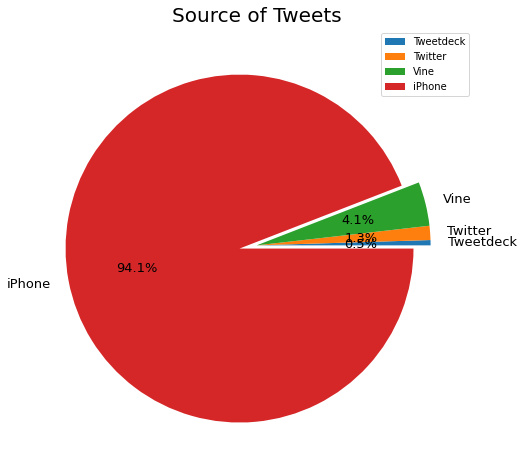

In [809]:
pie = tweetdata_clean.groupby('source').count()[['tweet_id']]
pie.rename(columns={'tweet_id': 'source'}, inplace=True)
pie['source_percentage'] = pie.source / pie.source.sum() * 100
pie['source_percentage'].plot.pie(figsize=(10,8), autopct='%1.1f%%',
        explode=(0,0,0,0.1), fontsize=13)
plt.title("Source of Tweets", {'fontsize': 20})
plt.legend(["Tweetdeck", "Twitter", "Vine", "iPhone"])
plt.ylabel("")


<b> 93.7% of the tweet is from iPhone, followed by Vine, Twitter and Tweetdect with 4.3%, 1.5% and 0.5% respectively


<b> Save clean data as file 'twitter_archive_master.csv'

In [810]:
twitter_df.to_csv(r"C:\Users\itjar\Documents\Nanodegree\twitter_archive_master.csv")